#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 4
### Due: Monday, Feb 21th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 21th.

---

## Problem 1

Let $\mu$ be a real number. Let $\sigma$ be a strictly positive real number.

Show that for a Gaussian distribution $\mathscr{N}(\mu,\sigma)$, the mode is its mean $\mu$.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

<center>x at $\frac{d}{d(x)} h(x) = 0$ is the mode where $h(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$</center>

<center>Plugging in h(x):</center>

<center>$0 = \frac{d}{d(x)} (\frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}})$
$= \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}} \frac{d}{d(x)}(\frac{-(x-\mu)^2}{2\sigma^2})$
$= \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}} \frac{-2(x-\mu)}{2\sigma^2} dx$
$= \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}} \frac{(\mu-x)}{\sigma^2} dx$</center>

<center>Solving for x:</center>

<center>$0 = \frac{(\mu-x)}{\sigma^2}$</center>

<center>$\mu = x $</center>

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

 1) Create a `scipy.stats` Gaussian object with the given $\mu$ and $\sigma$. a) Plot the distribution, b) give 10 random draws, along with the pdf at each of the draws.

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 130? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?



### Solution



This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with the given $\mu$ and $\sigma$.

    a) Plot the distribution

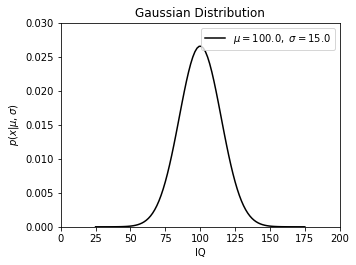

In [1]:
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np

distG = scipy.stats.norm(100,15) # Normal distribution with mean = 100, stdev = 15

#Get range
mu = distG.mean()
sigma = distG.std()
lowRange = mu - 5*sigma
upRange = mu + 5*sigma

## Plot a Gaussian Distribution
xgrid = np.linspace(lowRange,upRange,100) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid
# actual plotting
fig1, ax = plt.subplots(figsize=(5, 3.75))

# Python3 f strings are awesome!
plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('IQ')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()

     b) give 10 random draws, along with the pdf at each of the draws.

In [2]:
draws = distG.rvs(10) # 10 random draws
print(draws)
pdfAtDraw = distG.pdf(draws)
print(pdfAtDraw)

[ 93.0718481  114.56070544 121.15204481 101.33859077  94.86900025
  74.93244046  92.98637215 102.47905886  69.56365124 122.38222327]
[0.02390533 0.01660367 0.00984068 0.02649046 0.02508479 0.00658215
 0.02384211 0.02623539 0.00339452 0.00873653]


2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

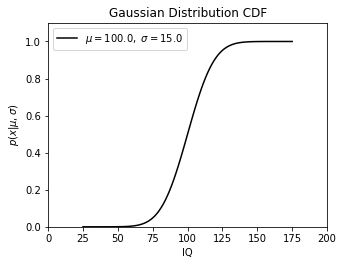

In [3]:
#Get range
mu = distG.mean()
sigma = distG.std()
lowRange = mu - 5*sigma
upRange = mu + 5*sigma

## Plot a Gaussian Distribution
xgrid = np.linspace(lowRange,upRange,100) # generate distribution for a uniform grid of x values
gaussCDF = distG.cdf(xgrid)  # this is a function of xgrid
# actual plotting
fig2, ax = plt.subplots(figsize=(5, 3.75))

# Python3 f strings are awesome!
plt.plot(xgrid, gaussCDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 1.1)
plt.xlabel('IQ')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution CDF')
plt.legend()

Text(0, 0.5, '$p(x|\\mu,\\sigma)$')

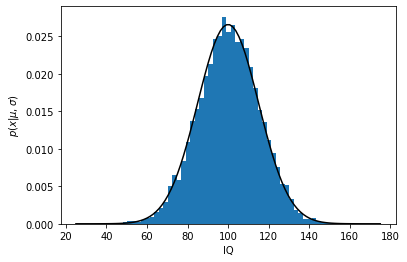

In [4]:
xValues = distG.ppf(uniform().rvs(10000))
plt.plot(xgrid, gaussPDF, ls='-', c='black',  label=f'$\mu={mu},\ \sigma={sigma}$')
plt.hist(xValues, density=True, bins = 50)
plt.xlabel('IQ')
plt.ylabel(r'$p(x|\mu,\sigma)$')


3) What fraction of people have IQ > 130? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

In [5]:
frac = ((1-distG.cdf(130))*100).round(3)
print(frac, "% of the population has an IQ >130")

2.275 % of the population has an IQ >130


4) What IQ corresponds to "one in a million"?

In [6]:
print("One in a million low IQ: ", distG.ppf(1/1000000).round(2))
print("One in a million high IQ: ", distG.ppf(1-1/1000000).round(2))

One in a million low IQ:  28.7
One in a million high IQ:  171.3
